In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/ML_Course/ML_project2/kc_house_data.csv')
dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataset1 =dataset['sqft_living']
X =dataset1.values
dataset2 = dataset['price']
Y = dataset2.values

In [ ]:
train_x, test_x,train_y, test_y = train_test_split(X, Y, test_size=0.15, random_state=4)

train_x = train_x.reshape(len(train_x), 1)
test_x = test_x.reshape(len(test_x), 1)

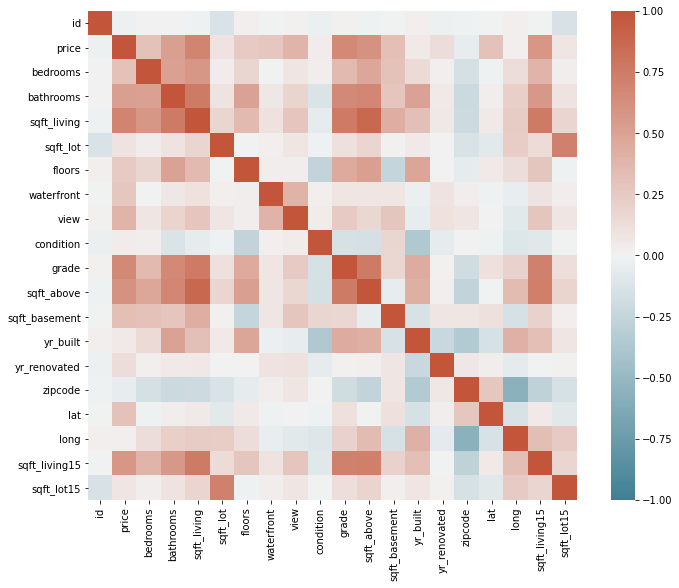

In [ ]:
graph = dataset.corr()

plt.figure(figsize=(12, 9))
ax = sns.heatmap(graph, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), square=True)

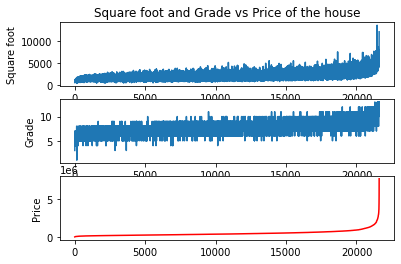

In [ ]:
x1 = dataset.iloc[:,2].name
x2 = dataset.loc[:,['sqft_living','grade',x1]].sort_values(x1, ascending=True).values
x3 = np.arange(y.shape[0])

plt.subplot(3,1,1)
plt.plot(x3,x2[:,0])
plt.title('Square foot and Grade vs Price of the house')
plt.ylabel('Square foot')

plt.subplot(3,1,2)
plt.plot(x3,x2[:,1])
plt.ylabel('Grade')
plt.subplot(3,1,3)
plt.plot(x3,x2[:,2],'r')
plt.ylabel("Price")
plt.show()

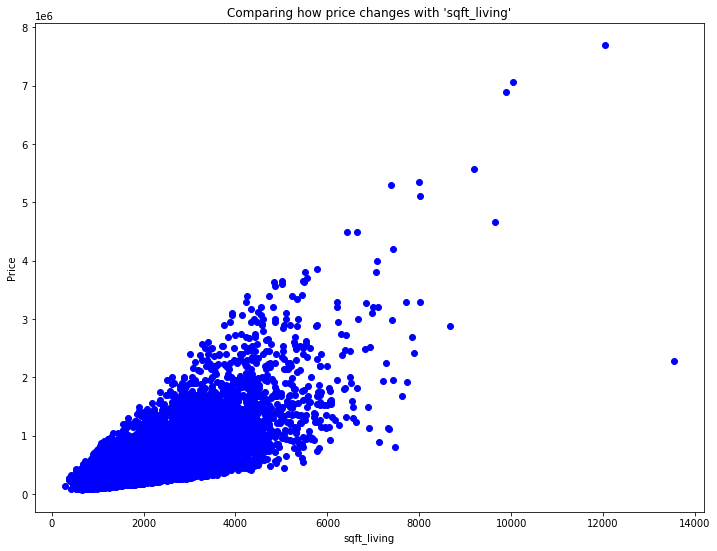

In [ ]:
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right' );
plt.figure(figsize=(12, 9))
plt.scatter(X,Y,color='blue')
plt.title("Comparing how price changes with 'sqft_living'")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.show()

In [ ]:
def train_model(rate,x,y,epochs):
  s = StandardScaler()
  j = 0
  k = 0
  data = s.fit_transform(x).flatten()
  length_x = float(len(x))
  for e in range(epochs):
    pred = k * data + j
    calculation_1 = np.sum(np.subtract(y,pred))*(-2/length_x)
    calculation_2 = np.sum(np.multiply(data, np.subtract(y,pred)))* (-2/length_x)
    k -=(rate * calculation_2)
    j -=(rate * calculation_1)
    if e%600 ==0:
      print("Epoch Number: ", e)
      print("Coefficient is: ", k)
      print("Cost is: ",(1/length_x)*np.sum(np.square(np.subtract(y,pred))))
      print("Intercept is: ",j)
      print("_______________________________________________")
  return j,k

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

s = StandardScaler()
inter,beta = train_model(0.01, train_x,train_y, 3000)
temp =s.fit_transform(test_x)
pred = beta * temp + inter
print("\n")
print("Mean Absolute Error: ", mean_absolute_error(test_y, pred))
print("\n")
print("R2 Score: ", r2_score(test_y, pred))

Epoch Number:  0
Coefficient is:  5170.240890144929
Cost is:  425394465263.321
Intercept is:  10771.010710358718
_______________________________________________
Epoch Number:  600
Coefficient is:  258510.6661802148
Cost is:  68529308811.91212
Intercept is:  538547.6640897883
_______________________________________________
Epoch Number:  1200
Coefficient is:  258512.0444997475
Cost is:  68529308801.34894
Intercept is:  538550.5355023138
_______________________________________________
Epoch Number:  1800
Coefficient is:  258512.04450724574
Cost is:  68529308801.34894
Intercept is:  538550.535517933
_______________________________________________
Epoch Number:  2400
Coefficient is:  258512.04450724574
Cost is:  68529308801.34894
Intercept is:  538550.535517933
_______________________________________________


Mean Absolute Error:  173407.8459421428


R2 Score:  0.48702424474467476
